# Analysis of Flight Delays (December 2019 and 2020)

## Data 
Airline Delays for December 2019 and 2020.

Description: Summary Data counts for airline per carrier per US City.

Attributes
- year: Year data collected
- month: representation of the month
- carrier: Carrier
- carrier_name: Carrier Name
- airport: Airport code
- airport_name: Name of airport
- arr_flights: Number of flights arriving at airport
- arr_del15: Number of flights more than 15 minutes late
- carrier_ct: Number of flights delayed due to air carrier (e.g. no crew)
- weather_ct: Number of flights due to weather
- nas_ct: Number of flights delayed due to National Aviation System (e.g. heavy air traffic)
- security_ct: Number of flights canceled due to a security breach
- late_aircraft_ct: Number of flights delayed as a result of another flight on the same aircraft delayed
- arr_cancelled: Number of cancelled flights
- arr_diverted: Number of flights that were diverted
- arr_delay: Total time (minutes) of delayed flight
- carrier_delay: Total time (minutes) of delay due to air carrier
- weather_delay: Total time (minutes) of delay due to inclement weather
- nas_delay: Total time (minutes) of delay due to National Aviation System
- security_delay: Total time (minutes) of delay as a result of a security issue
- late_aircraft_delay: Total time (minutes) of delay flights as a result of a previous flight on the same airplane being 

Recovered from: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E
And https://www.openintro.org/data/index.php?data=airline_delay

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import plotly.express as px
from adjustText import adjust_text
from matplotlib.ticker import MaxNLocator, FuncFormatter

pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica Neue']

In [35]:
df = pd.read_csv('data/airline_delay.csv')
display(df.head(3))
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,0.12,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,0.04,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,1.60,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0


The dataset has 3351 rows and 21 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3351.0,2019.459266,0.498412,2019.0,2019.00,2019.00,2020.000,2020.00
month,3351.0,12.000000,0.000000,12.0,12.00,12.00,12.000,12.00
arr_flights,3343.0,298.271014,852.436335,1.0,35.00,83.00,194.500,19713.00
arr_del15,3343.0,50.995214,146.484456,0.0,5.00,12.00,33.000,2289.00
carrier_ct,3343.0,16.065337,41.759516,0.0,1.49,4.75,12.255,697.00
weather_ct,3343.0,1.443144,4.821657,0.0,0.00,0.06,1.010,89.42
nas_ct,3343.0,16.183383,56.423008,0.0,0.82,2.98,8.870,1039.54
security_ct,3343.0,0.137320,0.646479,0.0,0.00,0.00,0.000,17.31
late_aircraft_ct,3343.0,17.166069,55.447043,0.0,0.90,3.28,10.240,819.66
arr_cancelled,3343.0,2.884535,10.126658,0.0,0.00,0.00,2.000,224.00


In [6]:
print(f"Number of unique carriers: {df['carrier'].nunique()}")
print(f"Number of unique airports: {df['airport'].nunique()}")

Number of unique carriers: 17
Number of unique airports: 360


In [7]:
missing_values_count = df.isnull().sum()
print("Initial missing values count for columns with missing data:")
print(missing_values_count[missing_values_count > 0])
print("Dropping rows with missing data...")
df = df.dropna(axis=0).reset_index(drop=True)

Initial missing values count for columns with missing data:
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64
Dropping rows with missing data...


## Question 1
What variables sum up to `arr_del15`?

Hypothesis: `carrier_ct` + `weather_ct` + `nas_ct` + `late_aircraft_ct` = `arr_del15`

In [8]:
def find_matching_column_combinations(df, target_column, ignore=[], threshold=0.95): # imitating alpha 0.05
    df = df.copy()
    float_columns = df.select_dtypes(include=['float']).columns.tolist()
    float_columns.remove(target_column)
    float_columns = [col for col in float_columns if col not in ignore]
    
    valid_combinations = []

    for i in range(2, len(float_columns) + 1):  # min 2 columns
        for combo in combinations(float_columns, i):
            df['sum_combo'] = df[list(combo)].sum(axis=1)
            valid_rows = ((df[target_column] - 1 <= df['sum_combo']) & (df['sum_combo'] <= df[target_column] + 1)).sum() # Give an error margin of 1
            if valid_rows >= int(threshold * len(df)): # check the minimum number of rows that must match the criteria
                valid_combinations.append(combo)

    #df.drop('sum_combo', axis=1, inplace=True)
    print(f"Valid column combinations that match the criteria at least {threshold}% of the time:")
    return valid_combinations

In [9]:
valid_combos = find_matching_column_combinations(df, target_column='arr_del15')
for combo in valid_combos:
    print(combo)

Valid column combinations that match the criteria at least 0.95% of the time:
('carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct')
('carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct')


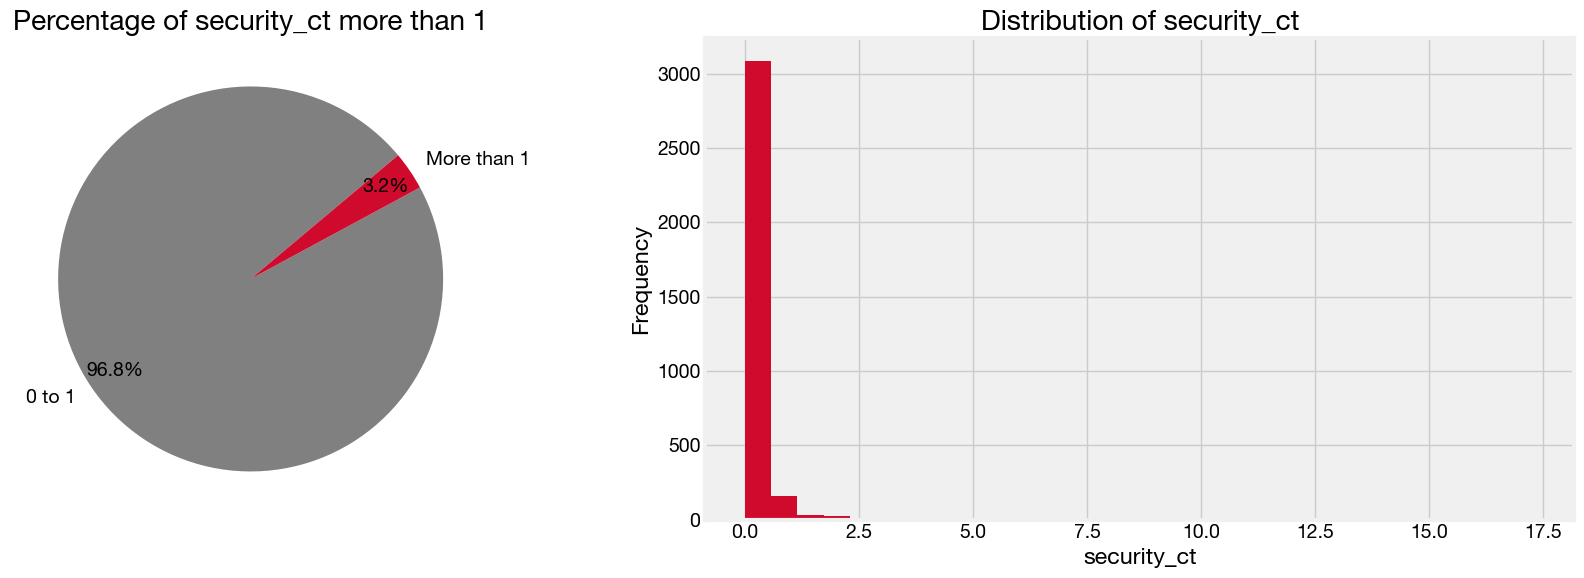

In [42]:
counts = {
    '0 to 1': ((df['security_ct'] >= 0) & (df['security_ct'] <= 1)).sum(),
    'More than 1': (df['security_ct'] > 1).sum()
}

colors = ['grey', '#CF0A2C']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6)) 

ax1.pie(counts.values(), labels=counts.keys(), colors=colors, autopct='%1.1f%%', startangle=40, pctdistance=0.85)
ax1.set_title('Percentage of security_ct more than 1')

ax2.hist(df['security_ct'], bins=30, color='#CF0A2C')
ax2.set_title('Distribution of security_ct')
ax2.set_xlabel('security_ct')
ax2.set_ylabel('Frequency')
ax2.grid(True)

plt.tight_layout()  
plt.show()

***intersection (&), union (|), difference (-), symmetric difference (^)***

In [11]:
float_columns = df.select_dtypes(include=['float']).columns.tolist()
delay_n_flights = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
print(f"Remaining columns: {set(float_columns) - set(delay_n_flights)}")

Remaining columns: {'arr_delay', 'nas_delay', 'security_delay', 'weather_delay', 'arr_flights', 'arr_diverted', 'carrier_delay', 'arr_cancelled', 'late_aircraft_delay'}


## Question 2
Knowing `carrier_ct`, `weather_ct`, `nas_ct`, `security_ct`, `late_aircraft_ct` sum up to `arr_del15`

What do `arr_flights`, `nas_delay`, `security_delay`, `carrier_delay`, `arr_delay`, `late_aircraft_delay`, `arr_diverted`, `arr_cancelled`, `weather_delay` represent?

In [12]:
ignore_num_flights_delay = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
valid_combos = find_matching_column_combinations(df, target_column='arr_delay', ignore=ignore_num_flights_delay, threshold=0.95)
for combo in valid_combos:
    print(combo)

Valid column combinations that match the criteria at least 0.95% of the time:
('carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay')


There are 5 independent attributes in the dataset. In the following dictionary they are marked as the key for the dictionary. The values are the dependent variables, which are basically suming up to their independent variable.

For those variables with no dependedent features, their value is simply marked as None

## Attribute Relationships

In [13]:
relationships = {
    # Total number of flights arriving at airport, use for percentage calculations
    'arr_flights': None,
    # Number of flights delayed 15 minutes or more
    'arr_del15': ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'],
    # Total time (minutes) of delayed flight.
    'arr_delay': ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
    # Number of cancelled flights
    'arr_cancelled': None,
    # Number of flights that were diverted
    'arr_diverted': None,
}

In [43]:
key_variables = list(relationships.keys())

desc_stats = df[key_variables].describe().T
print("Descriptive Statistics of main Attirbutes:\n")
display(desc_stats)

Descriptive Statistics of main Attirbutes:



,count,mean,std,min,25%,50%,75%,max
arr_flights,3343.0,298.271014,852.436335,1.0,35.0,83.0,194.5,19713.0
arr_del15,3343.0,50.995214,146.484456,0.0,5.0,12.0,33.0,2289.0
arr_delay,3343.0,3333.868083,10284.926623,0.0,230.0,746.0,2095.5,160383.0
arr_cancelled,3343.0,2.884535,10.126658,0.0,0.0,0.0,2.0,224.0
arr_diverted,3343.0,0.575830,2.097884,0.0,0.0,0.0,0.0,42.0


# Question 3

For 2019 or 2020, what is the percentage of delays according to the type of delay


Percentage of flights delayed due to carrier_ct: 28.74%
Percentage of flights delayed due to weather_ct: 2.49%
Percentage of flights delayed due to nas_ct: 30.45%
Percentage of flights delayed due to security_ct: 0.22%
Percentage of flights delayed due to late_aircraft_ct: 38.10%


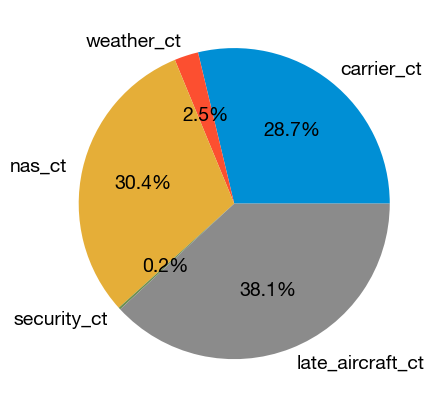

In [45]:
for reason in relationships['arr_del15']:
    print(f"Percentage of flights delayed due to {reason}: {(df[df.year == 2019][reason].sum() / df[df.year == 2019]['arr_del15'].sum())*100.0:.2f}%")

delay_causes = df[df.year == 2019][['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
delay_causes.plot(kind='pie', autopct='%1.1f%%')
plt.show()

Percentage of flights delayed due to carrier_ct: 39.55%
Percentage of flights delayed due to weather_ct: 3.82%
Percentage of flights delayed due to nas_ct: 35.49%
Percentage of flights delayed due to security_ct: 0.42%
Percentage of flights delayed due to late_aircraft_ct: 20.72%


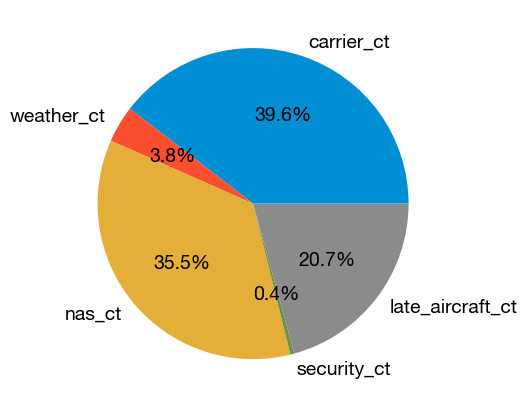

In [47]:
for reason in relationships['arr_del15']:
    print(f"Percentage of flights delayed due to {reason}: {(df[df.year == 2020][reason].sum() / df[df.year == 2020]['arr_del15'].sum())*100.0:.2f}%")
delay_causes = df[df.year == 2020][['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
delay_causes.plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Question 4

What are the total flights and percentage of flights per airline carrier?

In [17]:
def format_tick(value, tick_position):
    return f'{int(value):,}'

In [18]:
df.carrier_name.value_counts()

carrier_name
SkyWest Airlines Inc.      479
Envoy Air                  285
Delta Air Lines Inc.       252
Allegiant Air              240
Endeavor Air Inc.          226
Mesa Airlines Inc.         219
American Airlines Inc.     199
Republic Airline           196
United Air Lines Inc.      191
PSA Airlines Inc.          187
Frontier Airlines Inc.     184
Southwest Airlines Co.     181
Alaska Airlines Inc.       144
JetBlue Airways            120
ExpressJet Airlines LLC    106
Spirit Air Lines            97
Hawaiian Airlines Inc.      37
Name: count, dtype: int64

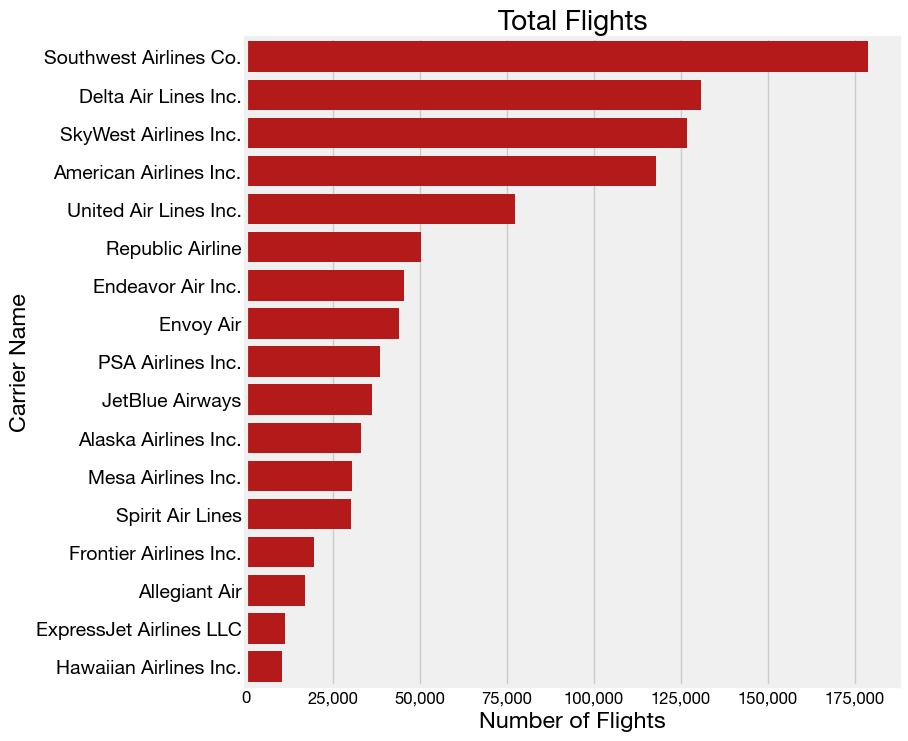

In [48]:
# Sum of flights
carrier_delays = df.groupby('carrier_name')['arr_flights'].sum()
carrier_delays.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(7.5, 8))
ax = sns.barplot(x=carrier_delays.values, y=carrier_delays.index, color='#CC0100')

formatter = FuncFormatter(format_tick)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', labelsize=12) 

plt.title('Total Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Carrier Name')
plt.show()

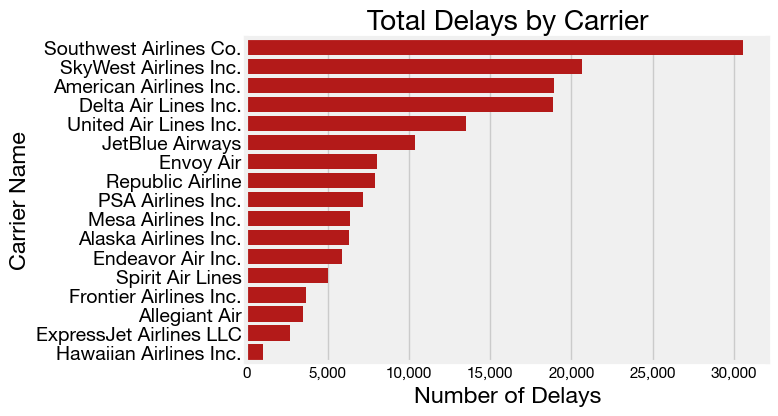

In [49]:
# Sum of delays
carrier_delays = df.groupby('carrier_name')['arr_del15'].sum()
carrier_delays.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=carrier_delays.values, y=carrier_delays.index, color='#CC0100')

formatter = FuncFormatter(format_tick)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', labelsize=11) 

plt.title('Total Delays by Carrier')
plt.xlabel('Number of Delays')
plt.ylabel('Carrier Name')
plt.show()

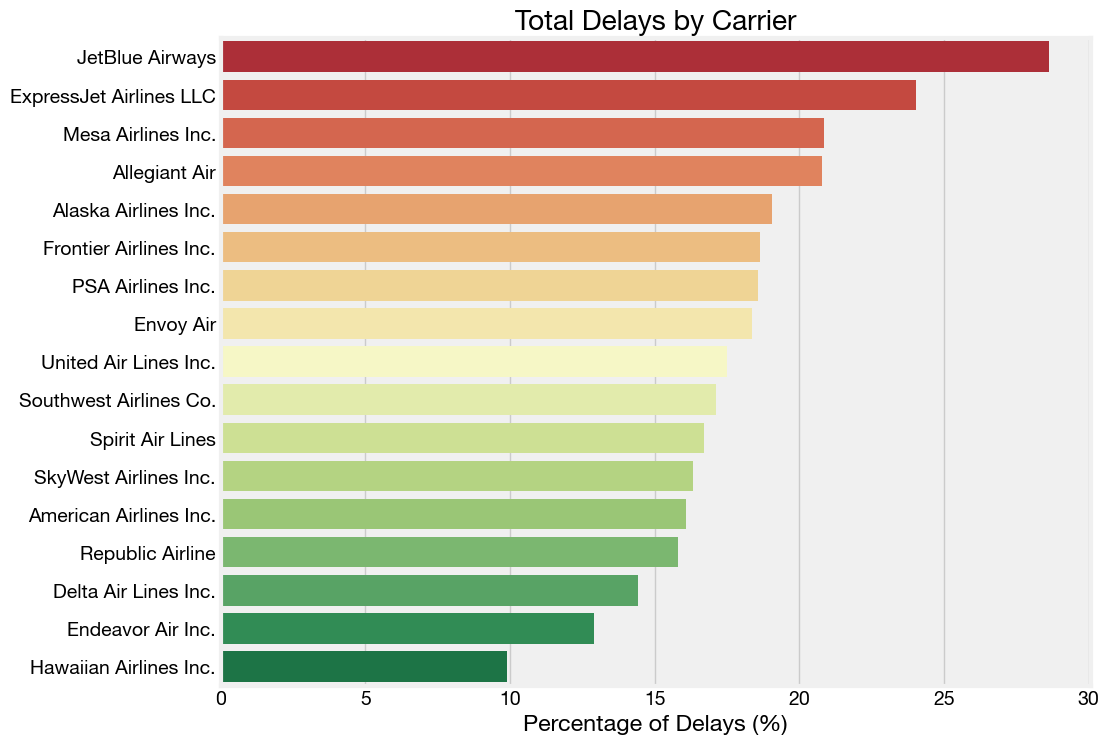

In [50]:
# percentage of delays
carrier_delays = df.groupby('carrier_name').agg({'arr_flights':'sum', 'arr_del15':'sum'}).reset_index()
carrier_delays['delay_percentage'] = (carrier_delays['arr_del15'] / carrier_delays['arr_flights']) * 100
carrier_delays = carrier_delays.sort_values(by='delay_percentage', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("RdYlGn", n_colors=len(carrier_delays))
sns.barplot(data=carrier_delays, x='delay_percentage' , y='carrier_name', hue='carrier_name', dodge=False, palette=palette, legend=False)
plt.title('Total Delays by Carrier')
plt.xlabel('Percentage of Delays (%)')
plt.ylabel('')
plt.show()

## Question 5

What are the average time of delays by airline?

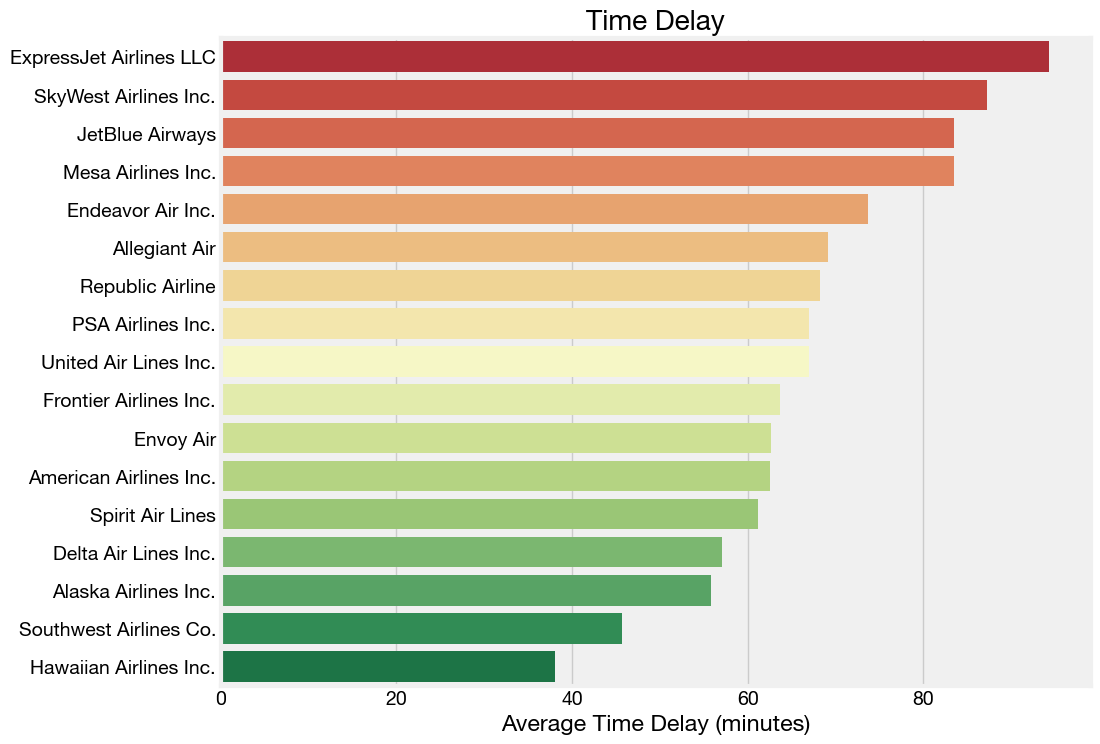

In [51]:
# time delay
carrier_delays = df.groupby('carrier_name').agg({'arr_del15':'sum', 'arr_delay':'sum'}).reset_index()
carrier_delays['delay_average'] = (carrier_delays['arr_delay'] / carrier_delays['arr_del15'])
carrier_delays = carrier_delays.sort_values(by='delay_average', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("RdYlGn", n_colors=len(carrier_delays))
sns.barplot(data=carrier_delays, x='delay_average' , y='carrier_name', hue='carrier_name', dodge=False, palette=palette, legend=False)
plt.title('Time Delay')
plt.xlabel('Average Time Delay (minutes)')
plt.ylabel('')
plt.show()

## Question 6
What is the matrix view between short/long and few/many delays?

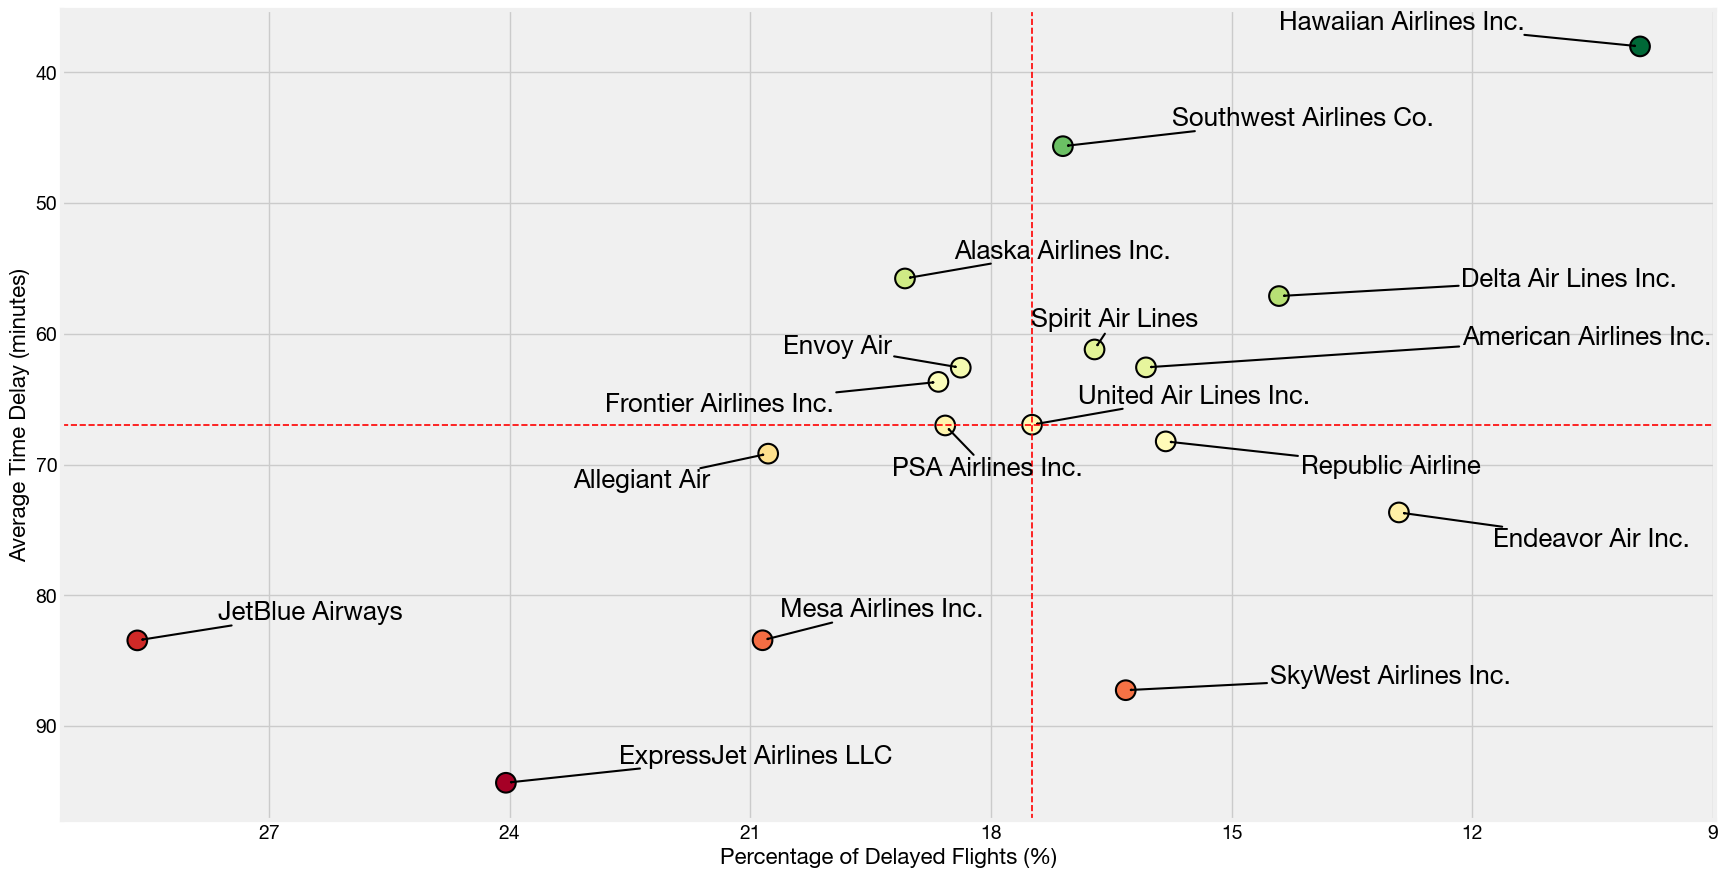

In [54]:
carrier_delays = df.groupby('carrier_name', observed=False).agg({'arr_flights':'sum', 'arr_del15':'sum', 'arr_delay':'sum'}).reset_index()
carrier_delays['delay_percentage'] = (carrier_delays['arr_del15'] / carrier_delays['arr_flights']) * 100
carrier_delays['delay_average'] = (carrier_delays['arr_delay'] / carrier_delays['arr_del15'])

plt.figure(figsize=(19, 10))
# Gradient color and plots
carrier_delays['color_metric'] = carrier_delays['delay_percentage'] + carrier_delays['delay_average']
color_scale = (carrier_delays['color_metric'] - carrier_delays['color_metric'].min()) / (carrier_delays['color_metric'].max() - carrier_delays['color_metric'].min())
# color scale obtained with the help of ChatGPT
points = plt.scatter(carrier_delays['delay_percentage'], carrier_delays['delay_average'], c=color_scale, cmap='RdYlGn_r', s=200, edgecolors='black', linewidth=1.5)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # no decimals

# matrix median lines
plt.axvline(carrier_delays['delay_percentage'].median(), color='red', linestyle='--', linewidth=1.2)
plt.axhline(carrier_delays['delay_average'].median(), color='red', linestyle='--', linewidth=1.2)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

#plt.title('Delay Performance Matrix', fontsize=20)
plt.xlabel('Percentage of Delayed Flights (%)', fontsize=16)
plt.ylabel('Average Time Delay (minutes)', fontsize=16)
plt.grid(True)

# airline names
texts = [plt.text(carrier_delays.delay_percentage[i], carrier_delays.delay_average[i], 
                  carrier_delays.carrier_name[i], horizontalalignment='left', size=18.6, color='black')
         for i in range(carrier_delays.shape[0])]
adjust_text(texts, expand=(1.97, 2.23), arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))

plt.show()

## Question 7

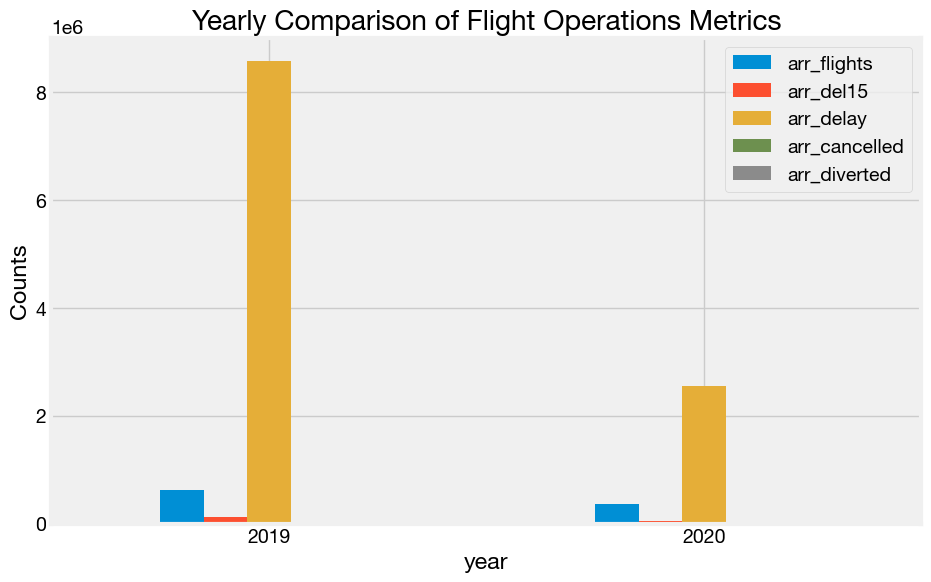

In [55]:
yearly_summary = df.groupby('year')[key_variables].sum()
yearly_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Comparison of Flight Operations Metrics')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

## Question 8

What are the main causes for delays?

How do they compare between 2019 and 2020?

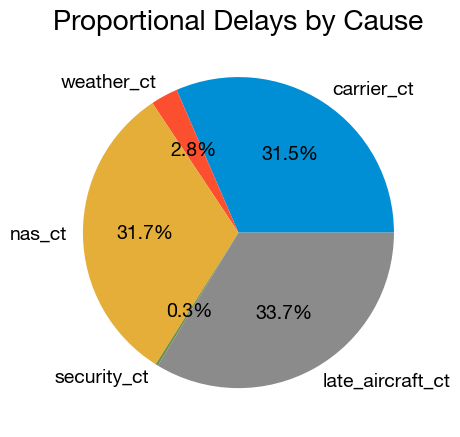

In [56]:
# Delays by cause
delay_causes = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
delay_causes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportional Delays by Cause')
plt.show()

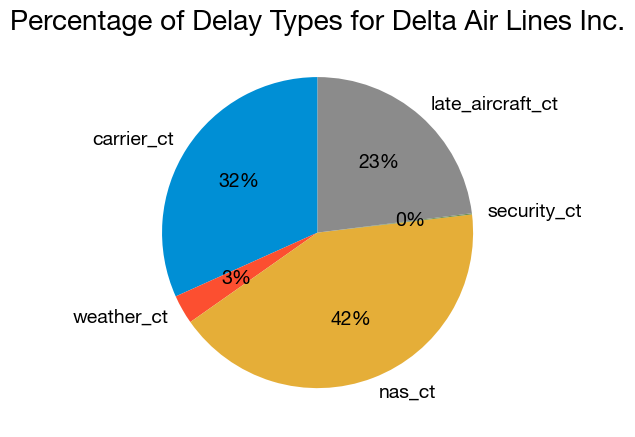

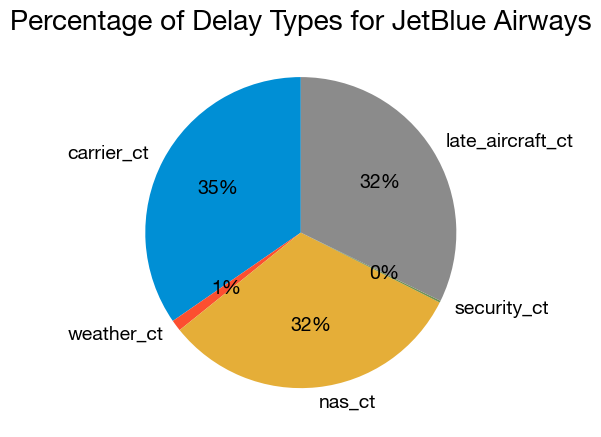

In [29]:
df['carrier_name'] = df['carrier_name'].astype('category')

delta_data = df[df['carrier_name'] == 'Delta Air Lines Inc.'].copy()
jetblue_data = df[df['carrier_name'] == 'JetBlue Airways'].copy()

def plot_delay_types_pie(airline_data, airline_name):
    delay_types = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
    total_delays = airline_data['arr_del15'].sum()
    delay_percentages = [(airline_data[delay].sum() / total_delays * 100) for delay in delay_types]

    fig, ax = plt.subplots()
    ax.pie(delay_percentages, labels=delay_types, autopct='%1.0f%%', startangle=90)
    
    plt.title(f'Percentage of Delay Types for {airline_name}')
    plt.show()

plot_delay_types_pie(delta_data, 'Delta Air Lines Inc.')
plot_delay_types_pie(jetblue_data, 'JetBlue Airways')